# forcasting CocaCola prices

In [ ]:
#Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model
#explaining .how many dummy variables you have created and RMSE value for each model.
#Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [6]:
df=pd.read_excel("C:\\Users\\hp\\Desktop\\All assignments\\forcasting assignment\\CocaCola_Sales_Rawdata.xlsx")

In [7]:
df1 = df.copy()
df1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [8]:
df1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
df1.dtypes

Quarter     object
Sales      float64
dtype: object

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [11]:
temp = df1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [12]:
df1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [13]:
df1.head()


,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [14]:
df1 = df1.drop(['Quarter'], axis=1)


In [15]:
df1.reset_index(inplace=True)

In [16]:
df1['quater'] = pd.to_datetime(df1['quater'])

In [17]:
df1 = df1.set_index('quater')

In [18]:
df1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


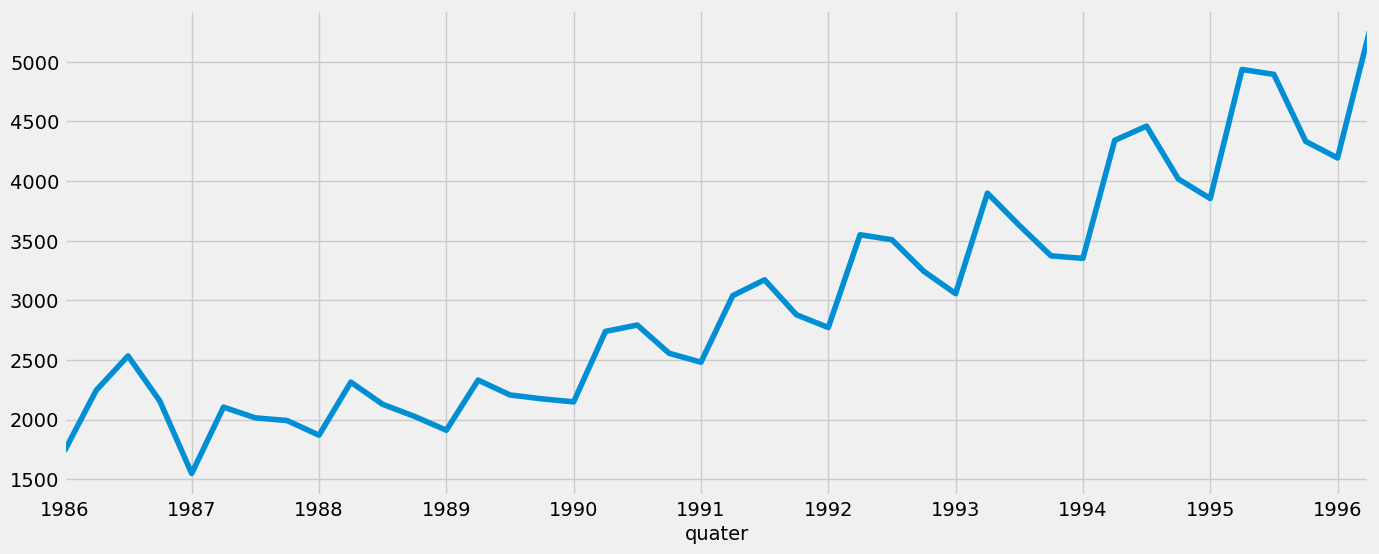

In [19]:
df1['Sales'].plot(figsize=(15, 6))
plt.show()

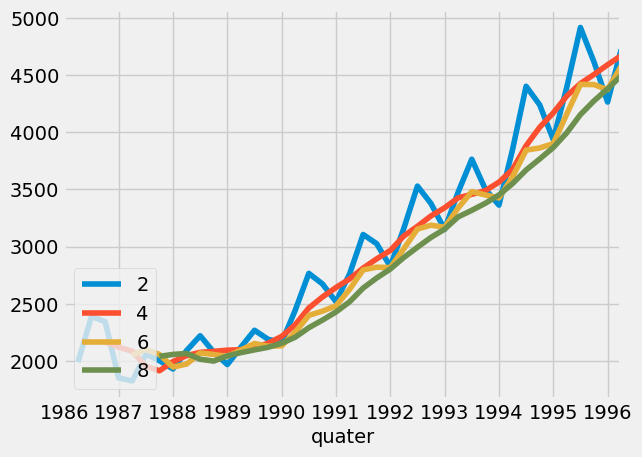

In [20]:
for i in range(2,10,2):
    df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

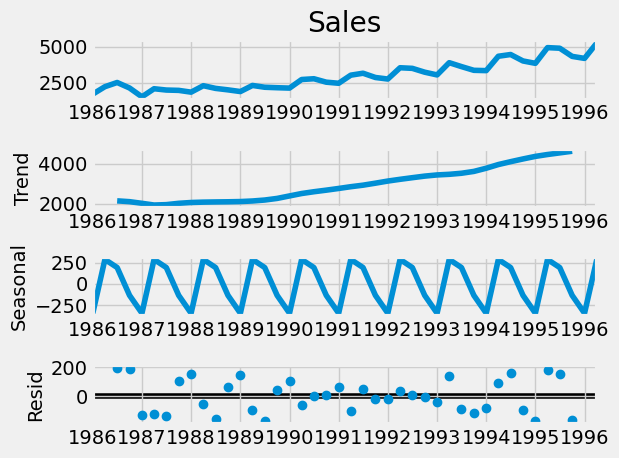

In [21]:
ts_add = seasonal_decompose(df1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

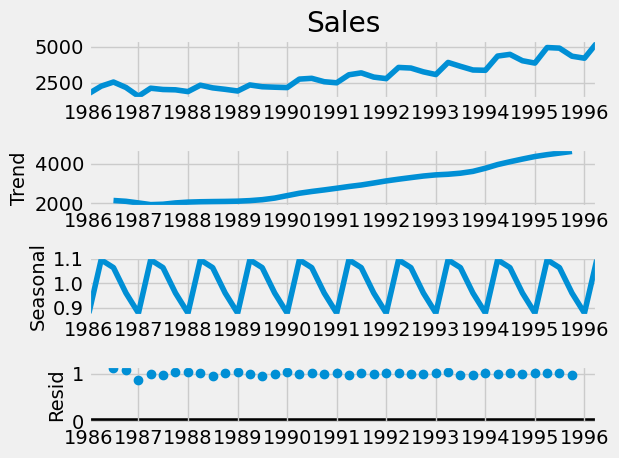

In [22]:
ts_mul = seasonal_decompose(df1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

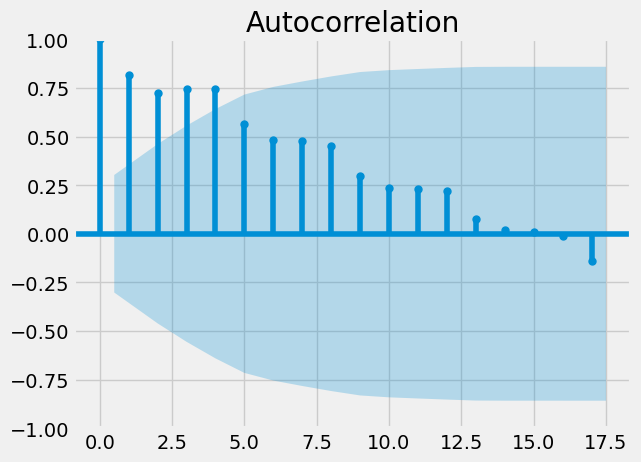

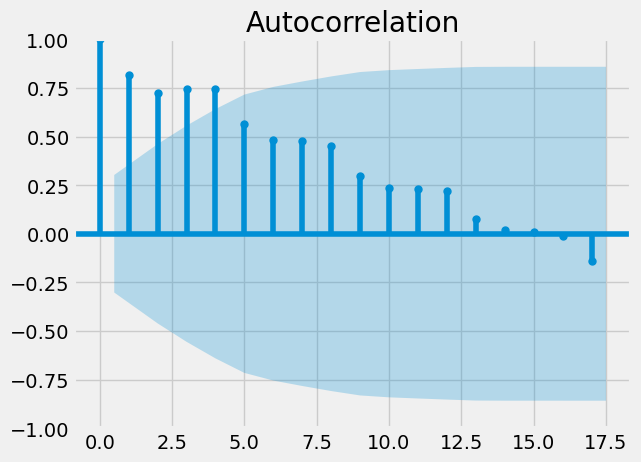

In [23]:
tsa_plots.plot_acf(df1.Sales)

In [24]:
X = df1['Sales'].values

In [25]:
size = int(len(X) * 0.66)

In [26]:
train, test = X[0:size], X[size:len(X)]

In [57]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5,1,0))

In [60]:
model_fit = model.fit()

In [61]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Fri, 24 Nov 2023   AIC                            360.163
Time:                        02:33:31   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

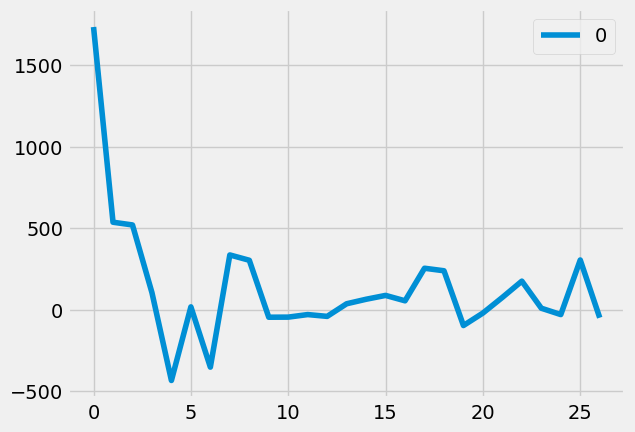

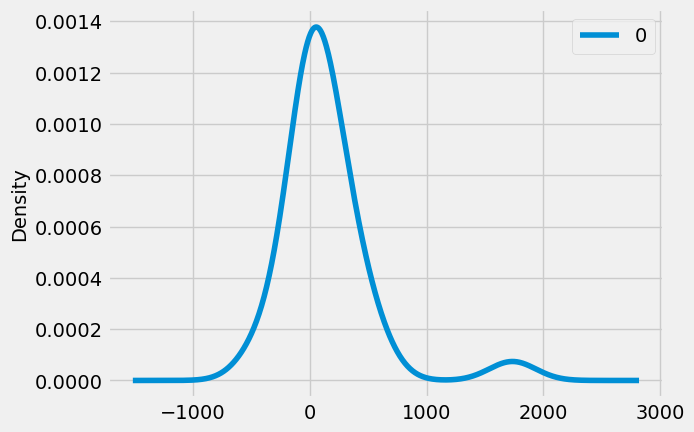

                 0
count    27.000000
mean    137.791853
std     385.970462
min    -433.659591
25%     -34.938860
50%      55.067400
75%     247.080157
max    1734.827000


In [62]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [31]:
#The plot of the residual errors suggests that there may still be some trend information not captured by the model
#The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)
history = [x for x in train]


In [32]:
predictions = list()

In [65]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3130.132567, expected=3243.859993
predicted=3167.315970, expected=3056.000000
predicted=3717.472605, expected=3899.000000
predicted=3775.837495, expected=3629.000000
predicted=3332.727871, expected=3373.000000
predicted=3258.576338, expected=3352.000000
predicted=4081.006048, expected=4342.000000
predicted=3955.786233, expected=4461.000000
predicted=4146.277853, expected=4017.000000
predicted=3958.436750, expected=3854.000000
predicted=4701.652911, expected=4936.000000
predicted=4990.072284, expected=4895.000000
predicted=4390.352783, expected=4333.000000
predicted=4190.807855, expected=4194.000000
predicted=5176.917412, expected=5253.000000


In [66]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34280.828


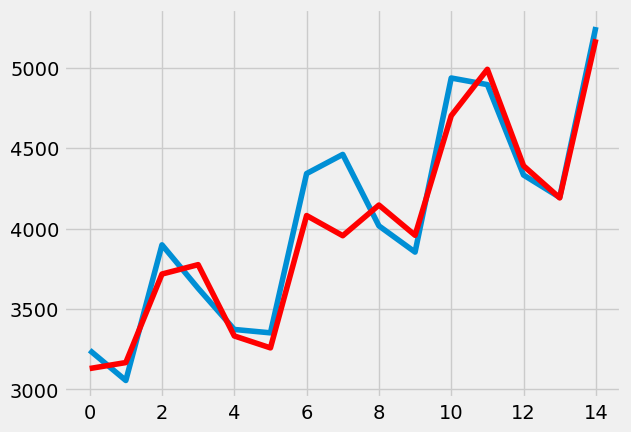

In [67]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [36]:
df2 = pd.get_dummies(df, columns = ['Quarter'])

In [37]:
df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [38]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
t= np.arange(1,43)

In [40]:
df2['t'] = t

In [41]:
df2['t_sq'] = df2['t']*df2['t']

In [42]:
log_Sales=np.log(df2['Sales'])

In [43]:
df2['log_Sales']=log_Sales

In [44]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [45]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin


580.1224130918641

In [46]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037103

In [47]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo


588.1405104900134

In [48]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd


1869.7188209186947

In [49]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372472

In [50]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.1144436053775

In [51]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407954374

In [52]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.687911932085

In [53]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467347524

In [54]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [55]:
rmse=pd.DataFrame(output)
print(rmse)


           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140510
5        rmselin   580.122413
6        rmsemul  2374.919441
7      rmsemulin  5359.687912
8       rmsequad   783.729798


In [56]:
#Additive seasonality with quadratic trend has the best RMSE value